# **Projeto Final: IA376I – Tópicos em Engenharia de Computação VII**
## **Tópico: Análise de Dados Visual (Visual Analytics)**
**Professora:** Wu, Shin - Ting<br><br>
**Alunos:**<br>
Luiz Roberto Albano Junior RA: 272746<br>
Tárcio Quissanga RA: 000
<br>
<br>


---




## **1. PROJETO**
Este projeto tem por objetivo realizar uma análise sobre os dados do **evasão dos alunos no IFSP - Instituto Federal de São Paulo** e analisar se este dado **não é influenciado pela renda familiar** (H0).

**Estátisticas de teste:** nível de evasão de alunos

### **1.1. Base de Dados**
Para construção deste projeto serão analisados os **micro dados** da Plataforma Nilo Peçanha (PNP) [1]. Segundo descrição do site:

> "A Plataforma Nilo Peçanha (PNP) é um ambiente virtual de coleta, validação e disseminação das estatísticas oficiais da Rede Federal de Educação Profissional, Científica e Tecnológica (Rede Federal). Tem como objetivo reunir dados relativos ao corpo docente, discente, técnico-administrativo e de gastos financeiros das unidades da Rede Federal, para fins de cálculo dos indicadores de gestão monitorados pela Secretaria de Educação Profissional e Tecnológica do Ministério da Educação (SETEC/MEC)."

Para o projeto selecionamos a base de dados referente aos micro dados de matrículas do ano base de 2020 [2].


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns


In [2]:
#Download da base de dados
!wget https://github.com/prof-LuizAlbano/feec-analise-dados-visual/raw/main/Tarefas/ProjetoFinal/BaseDados/microdados_matriculas_2021.zip

--2024-06-23 15:38:52--  https://github.com/prof-LuizAlbano/feec-analise-dados-visual/raw/main/Tarefas/ProjetoFinal/BaseDados/microdados_matriculas_2021.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/prof-LuizAlbano/feec-analise-dados-visual/main/Tarefas/ProjetoFinal/BaseDados/microdados_matriculas_2021.zip [following]
--2024-06-23 15:38:52--  https://raw.githubusercontent.com/prof-LuizAlbano/feec-analise-dados-visual/main/Tarefas/ProjetoFinal/BaseDados/microdados_matriculas_2021.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56492054 (54M) [application/zip]
Saving to: ‘microdados_matr

In [3]:
#Descompactação do arquivo
!unzip microdados_matriculas_2021.zip

Archive:  microdados_matriculas_2021.zip
  inflating: microdados_matriculas_2021.csv  


In [2]:
#Leitura da Base de dados dos Microdados Matriculados até 2019, fornecido pelo MEC

df = pd.read_csv('BaseDados/microdados_matriculas_2020.csv', sep=';', low_memory=False)
#df.head()

#Conhecendo a forma (tamanho da dataset), vendo o volume de dados com as quais estaremos trabalhando para a nossa análise e as colunas todas para selecionarmos as que interessam para o nosso estudo
df.shape
#df.columns

(1023303, 54)

In [4]:
df.head()

,Teste,Carga Horaria,Carga Horaria Minima,Categoria da Situação,Código do Ciclo Matricula,Código da Matricula,Código da Unidade de Ensino - SISTEC,Cod Unidade,Cor / Raça,Data de Inicio do Ciclo,...,Vagas Extraordinárias l9,Vagas Regulares AC,Vagas Regulares l10,Vagas Regulares l13,Vagas Regulares l14,Vagas Regulares l1,Vagas Regulares l2,Vagas Regulares l5,Vagas Regulares l6,Vagas Regulares l9
0,1,4535,3600,Concluintes,1978481,64063592,3483,147,Não declarada,20/02/2015,...,0.0,17.0,0.0,0.0,0.0,2.0,7.0,2.0,7.0,0.0
1,1,4535,3600,Em curso,1978481,64063608,3483,147,Não declarada,20/02/2015,...,0.0,17.0,0.0,0.0,0.0,2.0,7.0,2.0,7.0,0.0
2,1,4535,3600,Em curso,1978481,64063640,3483,147,Não declarada,20/02/2015,...,0.0,17.0,0.0,0.0,0.0,2.0,7.0,2.0,7.0,0.0
3,1,4535,3600,Em curso,1978481,64063638,3483,147,Não declarada,20/02/2015,...,0.0,17.0,0.0,0.0,0.0,2.0,7.0,2.0,7.0,0.0
4,1,4535,3600,Em curso,1978481,64063630,3483,147,Não declarada,20/02/2015,...,0.0,17.0,0.0,0.0,0.0,2.0,7.0,2.0,7.0,0.0


In [7]:
#Fazendo uma extração do Dataset geral somente as colunas que nos dariam os dados que interessariam para o nosso estudo
studyColumns = ['Cor / Raça', 'Eixo Tecnológico', 'Faixa Etária', 'Fator Esforco Curso', 'Fonte de Financiamento', 'Idade', 'Instituição', 'Modalidade de Ensino', 'Código do Município com DV', 'Nome de Curso', 'Região ', 'Renda Familiar', 'Sexo', 'Situação de Matrícula', 'Tipo de Curso', 'Turno', 'UF ', 'Unidade de Ensino']
df = df[studyColumns]
df.head()

,Cor / Raça,Eixo Tecnológico,Faixa Etária,Fator Esforco Curso,Fonte de Financiamento,Idade,Instituição,Modalidade de Ensino,Código do Município com DV,Nome de Curso,Região,Renda Familiar,Sexo,Situação de Matrícula,Tipo de Curso,Turno,UF,Unidade de Ensino
0,Não declarada,Recursos Naturais,20 a 24 anos,"1,15",Recursos Orçamentários,22.0,IFMT,Educação Presencial,5102637,Agronomia,Região Centro-Oeste,Não Declarada,Masculino,Concluída,Bacharelado,Integral,MT,Campus Campo Novo do Parecis
1,Não declarada,Recursos Naturais,20 a 24 anos,"1,15",Recursos Orçamentários,23.0,IFMT,Educação Presencial,5102637,Agronomia,Região Centro-Oeste,Não Declarada,Masculino,Em curso,Bacharelado,Integral,MT,Campus Campo Novo do Parecis
2,Não declarada,Recursos Naturais,30 a 34 anos,"1,15",Recursos Orçamentários,32.0,IFMT,Educação Presencial,5102637,Agronomia,Região Centro-Oeste,Não Declarada,Masculino,Em curso,Bacharelado,Integral,MT,Campus Campo Novo do Parecis
3,Não declarada,Recursos Naturais,20 a 24 anos,"1,15",Recursos Orçamentários,23.0,IFMT,Educação Presencial,5102637,Agronomia,Região Centro-Oeste,Não Declarada,Masculino,Em curso,Bacharelado,Integral,MT,Campus Campo Novo do Parecis
4,Não declarada,Recursos Naturais,20 a 24 anos,"1,15",Recursos Orçamentários,22.0,IFMT,Educação Presencial,5102637,Agronomia,Região Centro-Oeste,Não Declarada,Masculino,Em curso,Bacharelado,Integral,MT,Campus Campo Novo do Parecis


In [8]:
df.shape

(1023303, 18)

### **2. LIMPEZA E PREPARAÇÃO DOS DADOS**

In [9]:
# 2.1. Verificando dados em falta
print(df.isnull().sum())

Cor / Raça                    0
Eixo Tecnológico              0
Faixa Etária                  0
Fator Esforco Curso           0
Fonte de Financiamento        0
Idade                         2
Instituição                   0
Modalidade de Ensino          0
Código do Município com DV    0
Nome de Curso                 0
Região                        0
Renda Familiar                0
Sexo                          0
Situação de Matrícula         0
Tipo de Curso                 0
Turno                         0
UF                            0
Unidade de Ensino             0
dtype: int64


In [10]:
# 2.2. Removendo linhas com dados em falta
df_cleaned = df.dropna()
df_cleaned.shape

(1023301, 18)

In [11]:
# 2.3. Converter tipo de dado
df_cleaned['Idade'] = df_cleaned['Idade'].astype(int)

C:\Users\junio\AppData\Local\Temp\ipykernel_22416\526748933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
#Verificando os dados

#Renda Familiar
print(df_cleaned['Renda Familiar'].unique())

['Não Declarada' '0<RFP<=0,5' '0,5<RFP<=1,0' 'RFP>3,5' '1,5<RFP<=2,5'
 '1,0<RFP<=1,5' '2,5<RFP<=3,5']


In [13]:
#Situação de Matrícula
situacoes_matricula = df_cleaned['Situação de Matrícula'].unique()
situacoes_matricula

array(['Concluída', 'Em curso', 'Desligada', 'Abandono', 'Integralizada',
       'Transf. externa', 'Reprovado', 'Cancelada', 'Transf. interna'],
      dtype=object)

In [14]:
#Instituições
instituicoes = df_cleaned['Instituição'].unique()
instituicoes

array(['IFMT', 'IFSP', 'IFSUL', 'IFRO', 'CEFET-MG', 'IFRN', 'IFAL',
       'IFPR', 'CPII', 'IFBA', 'IFAM', 'IFAP', 'IFC', 'UFPB - CAVN',
       'IF SUDESTE MG', 'IFPE', 'IFTO', 'IFRJ', 'IFNMG', 'IFRS', 'IFB',
       'IFES', 'IFF', 'IFPB', 'IF SERTAO-PE', 'IFS', 'UFPB - ETS', 'IFSC',
       'IF FARROUPILHA', 'IFSULDEMINAS', 'IFMA', 'IF GOIANO', 'IFMS',
       'IFPA', 'IFMG', 'UFSM - CTISM', 'IFPI', 'IFCE',
       'UFSM - POLITECNICO', 'IFTM', 'IF BAIANO', 'UFTM - CEFORES',
       'IFRR', 'CEFET-RJ', 'UFV - CEDAF', 'IFG', 'UFRPE - CODAI',
       'UFU - ESTES', 'UFRN - EAJ', 'IFAC', 'UFCG - ETSC', 'EMUFPA',
       'UFMG - COLTEC', 'UFMG - TU', 'UFRR - EAGRO', 'UFRN - MUSICA',
       'ESUFRN', 'UFPI - CTF', 'UFRRJ - CTUR', 'UFMA - COLUN',
       'UFPI - CAT', 'ETDUFPA', 'UFPI - CABJ', 'UFAL - ETA'], dtype=object)

In [15]:
#Tipo de Curso
tipos_cursos = df_cleaned['Tipo de Curso'].unique()
tipos_cursos

array(['Bacharelado', 'Técnico', 'Tecnologia', 'Licenciatura',
       'Ensino Fundamental II', 'Mestrado', 'Ensino Médio', 'Doutorado',
       'Especialização (Lato Sensu)', 'Qualificação Profissional (FIC)',
       'Mestrado Profissional', 'Ensino Fundamental I',
       'Educação Infantil', 'Doutorado Profissional'], dtype=object)

In [16]:
#Faixa Etária
faixa_etaria = df_cleaned['Faixa Etária'].unique()
faixa_etaria

array(['20 a 24 anos', '30 a 34 anos', '45 a 49 anos', '50 a 54 anos',
       '40 a 44 anos', '35 a 39 anos', '25 a 29 anos', '15 a 19 anos',
       '55 a 59 anos', 'Menor de 14 anos', 'Maior de 60 anos'],
      dtype=object)

### **3. FILTROS E ANÁLISES INICIAIS DOS DADOS**

#### **3.1. ANÁLISE SOBRE OS DADOS GERAIS**

No dataset estão contidos dados de toda rede federal, portanto para cumprirmos com o objetivo deste projeto iremos filtrar apenas os registros que se referem ao **IFSP - Instituto Federal de São Paulo**.


In [17]:
df_filtered = df_cleaned[ (df_cleaned['Instituição'] == "IFSP") ]
df_filtered.shape

(62660, 18)

Incialmente, vamos analisar alguns quantificadores por variáveis, para entender os dados do dataset.

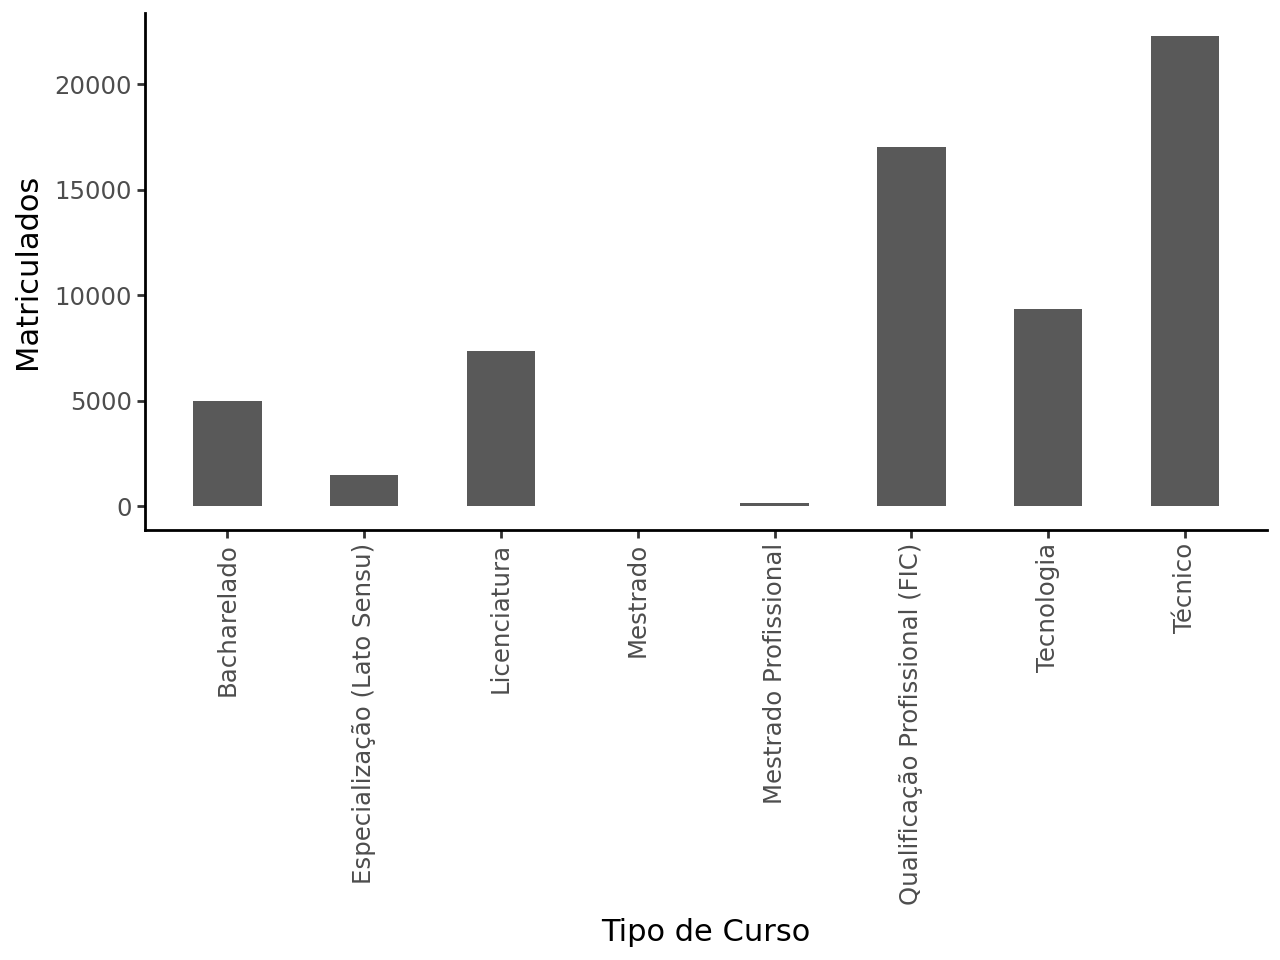

In [18]:
#Matrículas por tipo de curso

(
    ggplot(df_filtered, aes(x="Tipo de Curso"))
    + geom_histogram(binwidth=0.5, show_legend=True)
    + labs(y="Matriculados")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

Por termos um baixo número de matrículas nos cursos de Mestrado e Mestrado Profissional, vamos filtrar o dataset sem estes dados.

In [19]:
df_filtered = df_filtered[ ~df_filtered['Tipo de Curso'].isin(['Mestrado', 'Mestrado Profissional', 'Qualificação Profissional (FIC)']) ]
df_filtered.shape

(45442, 18)

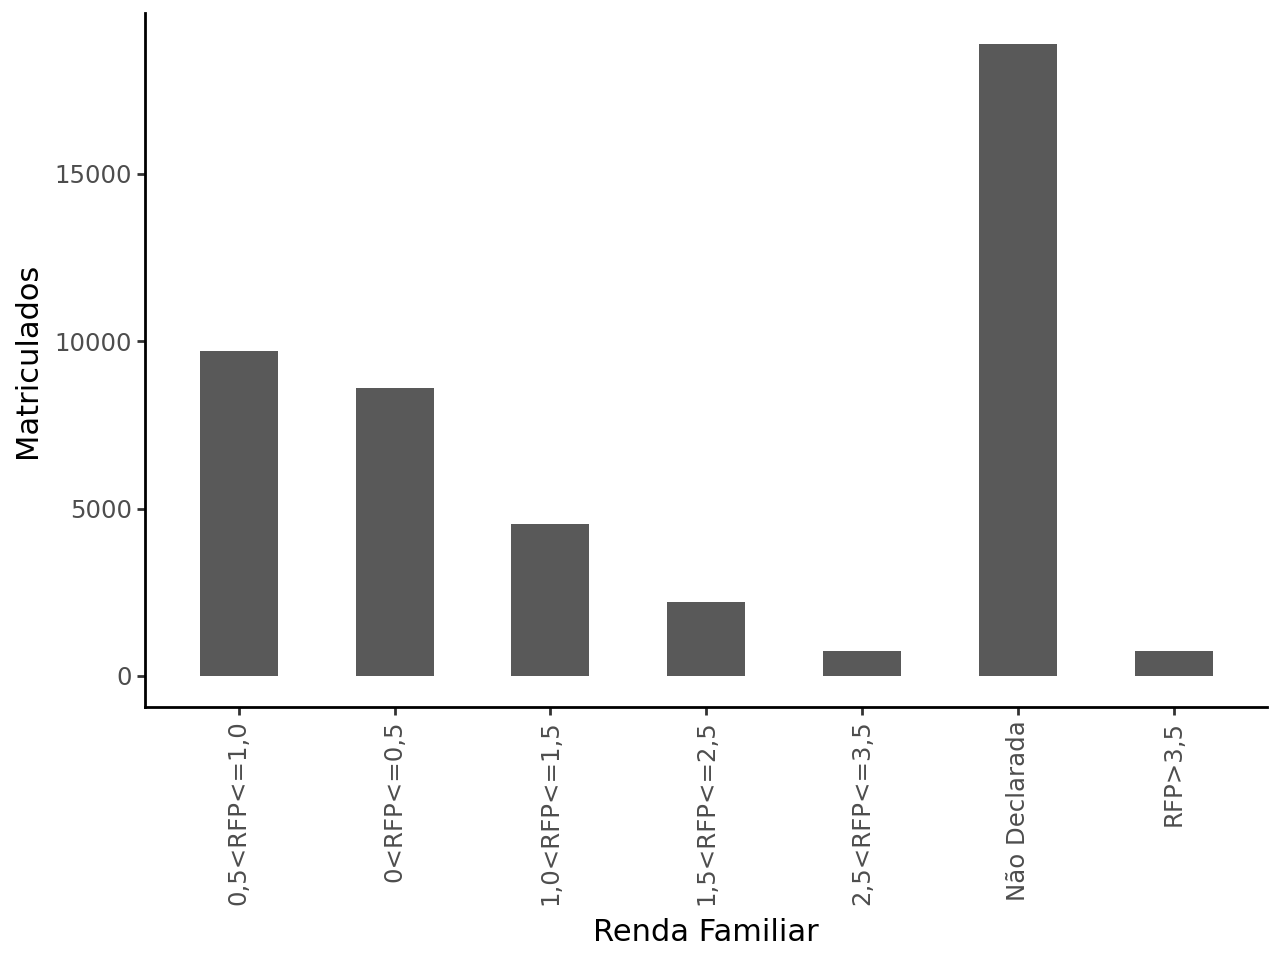

In [22]:
#Renda Familiar

(
    ggplot(df_filtered, aes(x="Renda Familiar"))
    + geom_histogram(binwidth=0.5, show_legend=True)
    + labs(y="Matriculados")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

Notamos que o maior número de matriculados estão nas duas primeiras faixas de RFP.<br>
Para nossos estudos teremos que remover os registros cujas matrículas não tenham declarada sua renda familiar.

In [24]:
df_filtered = df_filtered[ ~df_filtered['Renda Familiar'].isin(['Não Declarada']) ]
df_filtered.shape

(26572, 18)

**Renda Familiar - Legenda**<br>
RFP: Renda familiar per capita. É um valor utilizado pelo governo para comprovação de participação dos programas do governo federal. É calculado com base na soma da renda de todos os moradores de uma residência, dividida pelo número total de pessoas que vivem sob manutenção desta renda total.

Os agrupamentos utilizados no dataset são:

RFP            | Descrição
---------------|-----------
**0<RFP<=0,5** | renda entre R\$ 0,00 e R\$ 500,00 por pessoa
**0,5<RFP<=1** | renda entre R\$ 500,00 e R\$ 1.000,00 por pessoa
**1<RFP<=1,5** | renda entre R\$ 1.000,00 e R\$ 1.500,00 por pessoa
**1,5<RFP<=2,5** | renda entre R\$ 1.500,00 e R\$ 2.500,00 por pessoa
**2,5<RFP<=3,5** | renda entre R\$ 2.500,00 e R\$ 3.500,00 por pessoa
**RFP>3,5** | renda acima de R\$ 3.500,00 por pessoa

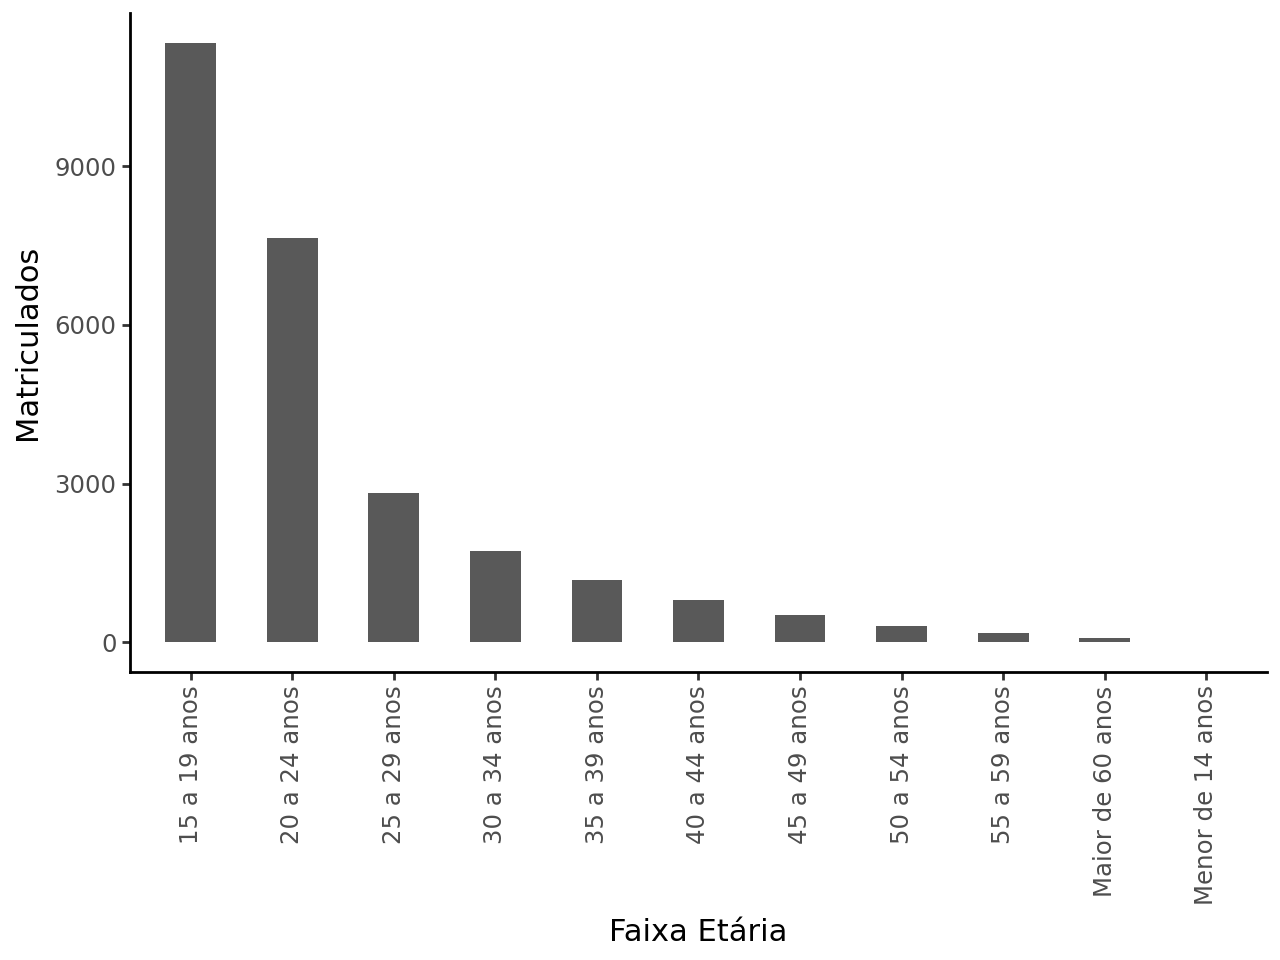

In [25]:
#Faixa Etária

(
    ggplot(df_filtered, aes(x="Faixa Etária"))
    + geom_histogram(binwidth=0.5, show_legend=True)
    + labs(y="Matriculados")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

No gráfico acima podemos notar que o maior número de matriculados estão em faixas de idades que provavelmente estão fora do mercado de trabalho ou no início de suas carreiras e podem ter uma dependência maior da renda da família.

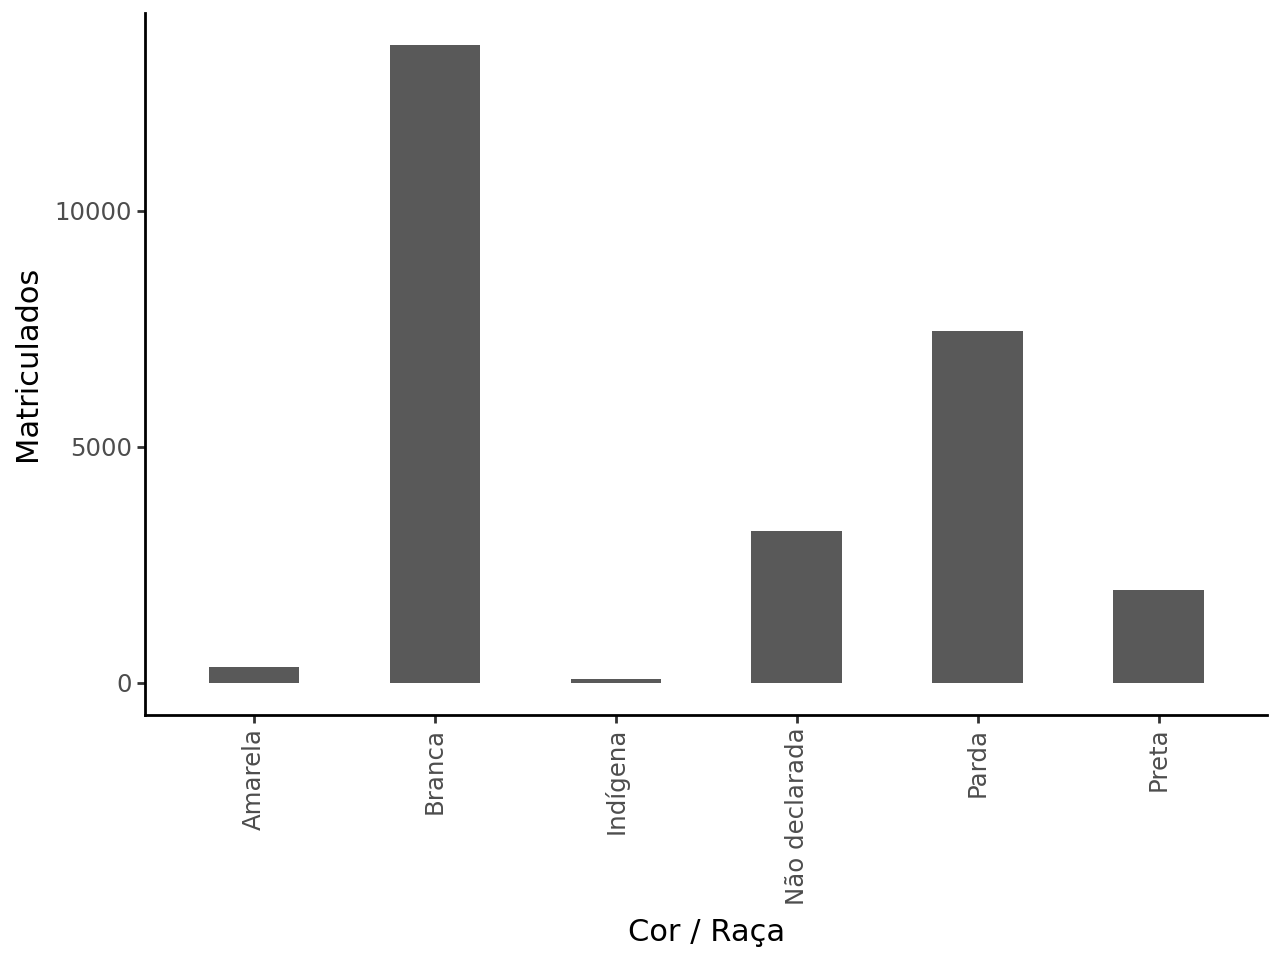

In [27]:
#Cor/Raça

(
    ggplot(df_filtered, aes(x="Cor / Raça"))
    + geom_histogram(binwidth=0.5, show_legend=True)
    + labs(y="Matriculados")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

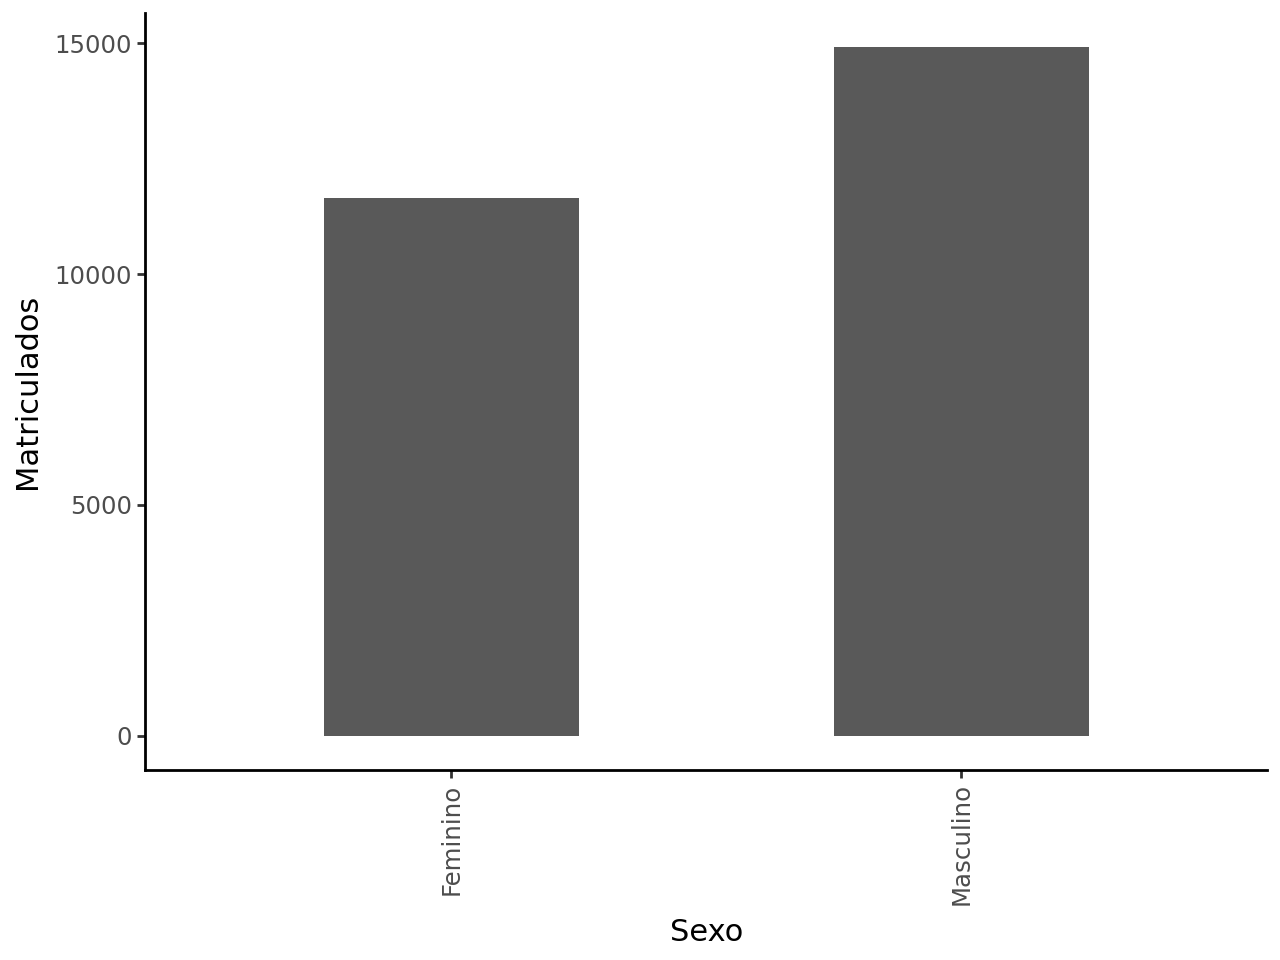

In [28]:
#Sexo

(
    ggplot(df_filtered, aes(x="Sexo"))
    + geom_histogram(binwidth=0.5, show_legend=True)
    + labs(y="Matriculados")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

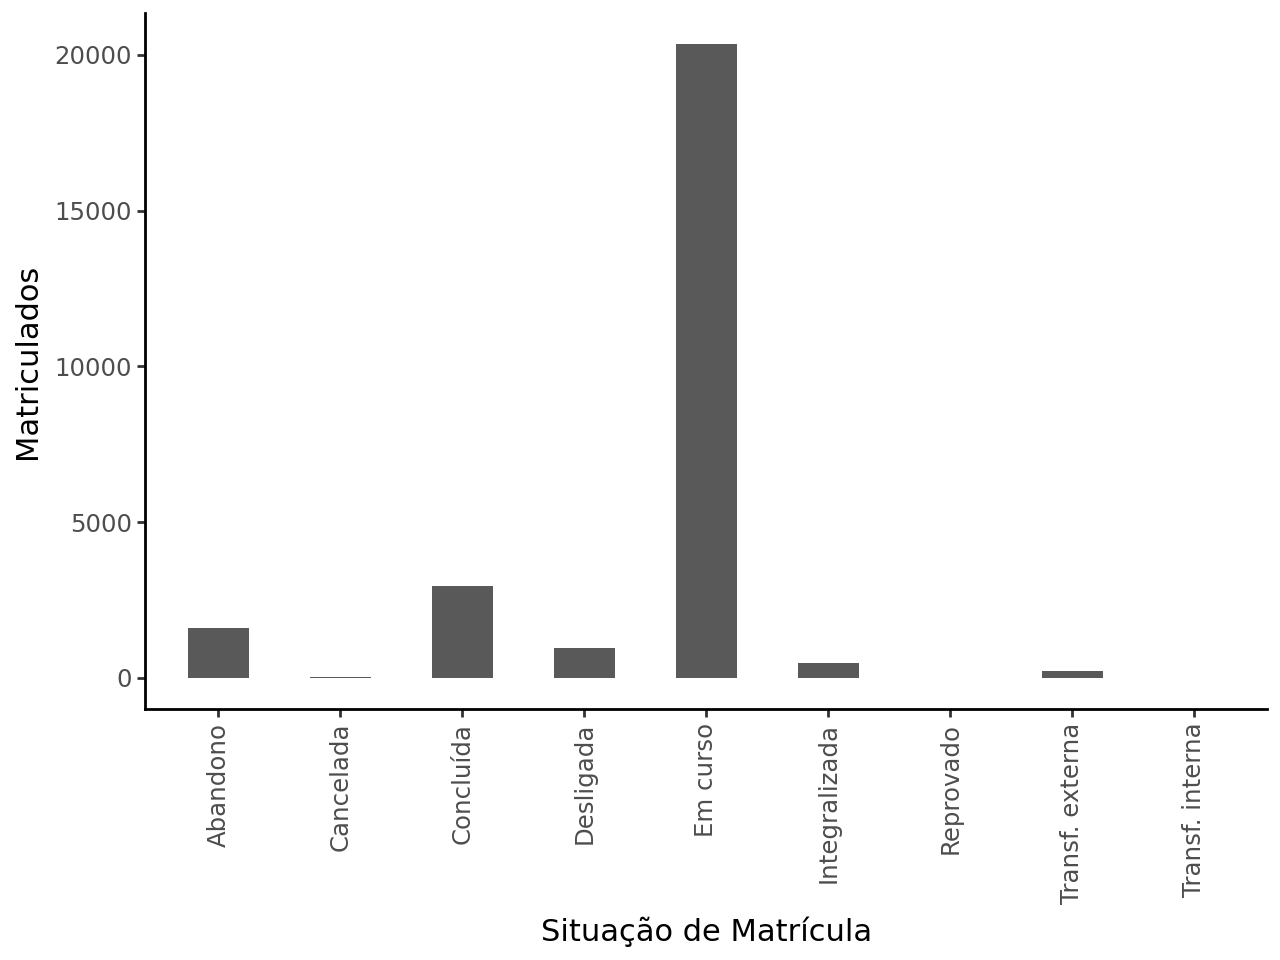

In [29]:
#Situaçao de Matricula

(
    ggplot(df_filtered, aes(x="Situação de Matrícula"))
    + geom_histogram(binwidth=0.5, show_legend=True)
    + labs(y="Matriculados")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

E por fim, os totais por tipo de matricula, onde podemos notar que o Abandono é a maior quantidade entre as situações que impedem os alunos de não concluirem um curso (Abandono, Cancelamento, Desligamento, Reprovação).

In [30]:
df_evaded = df_filtered[ df_filtered['Situação de Matrícula'].isin(['Abandono']) ]
df_evaded.shape

(1594, 18)

#### **3.2. ANÁLISE SOBRE OS DADOS DE EVASÃO**

**Evasão por: Tipo de Curso**

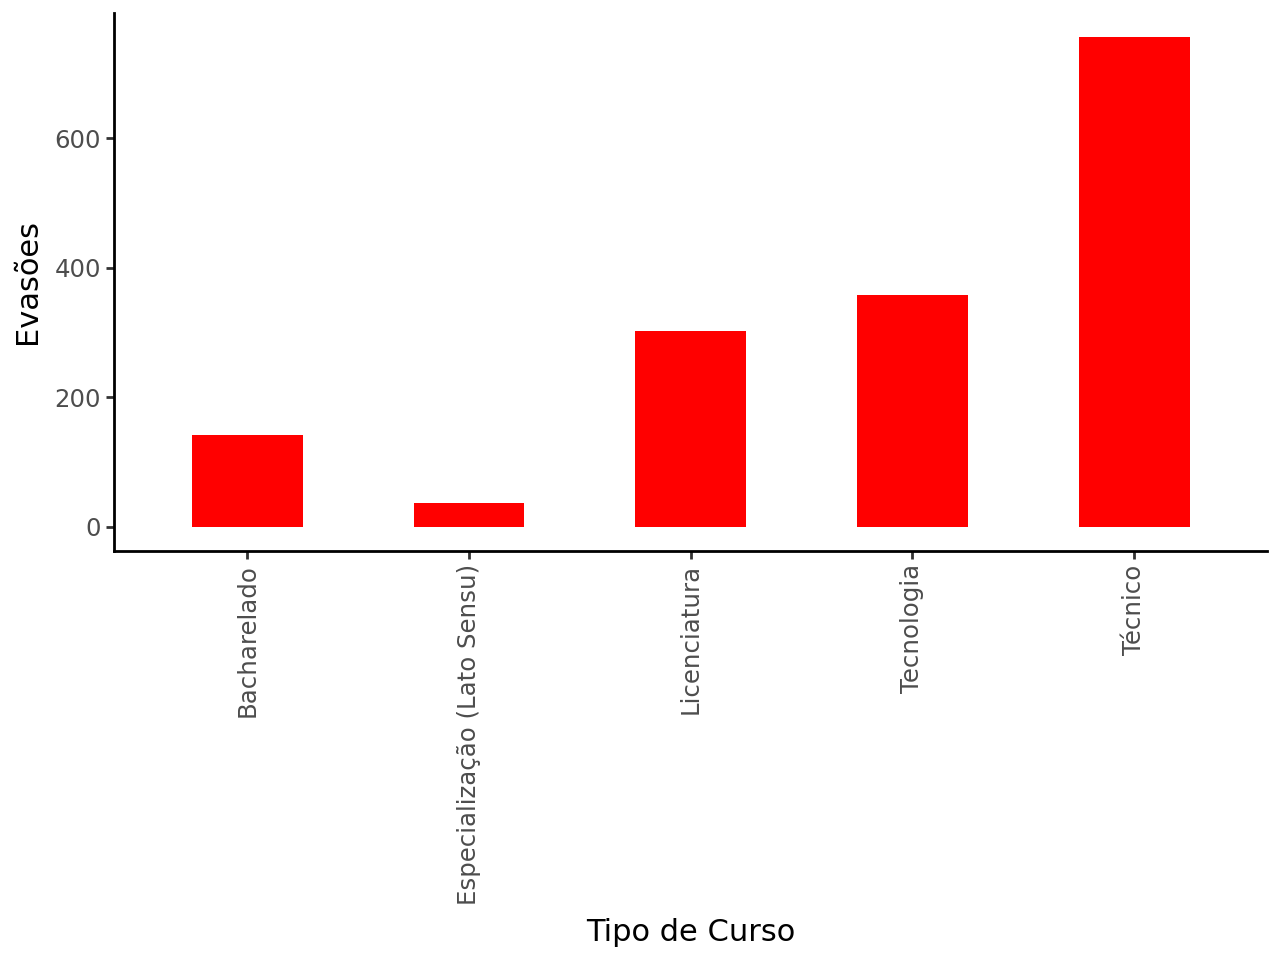

In [31]:
#Matrículas por tipo de curso

(
    ggplot(df_evaded, aes(x="Tipo de Curso"))
    + geom_histogram(binwidth=0.5, show_legend=True, fill="red")
    + labs(y="Evasões")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

**Evasão por: Renda Familiar**

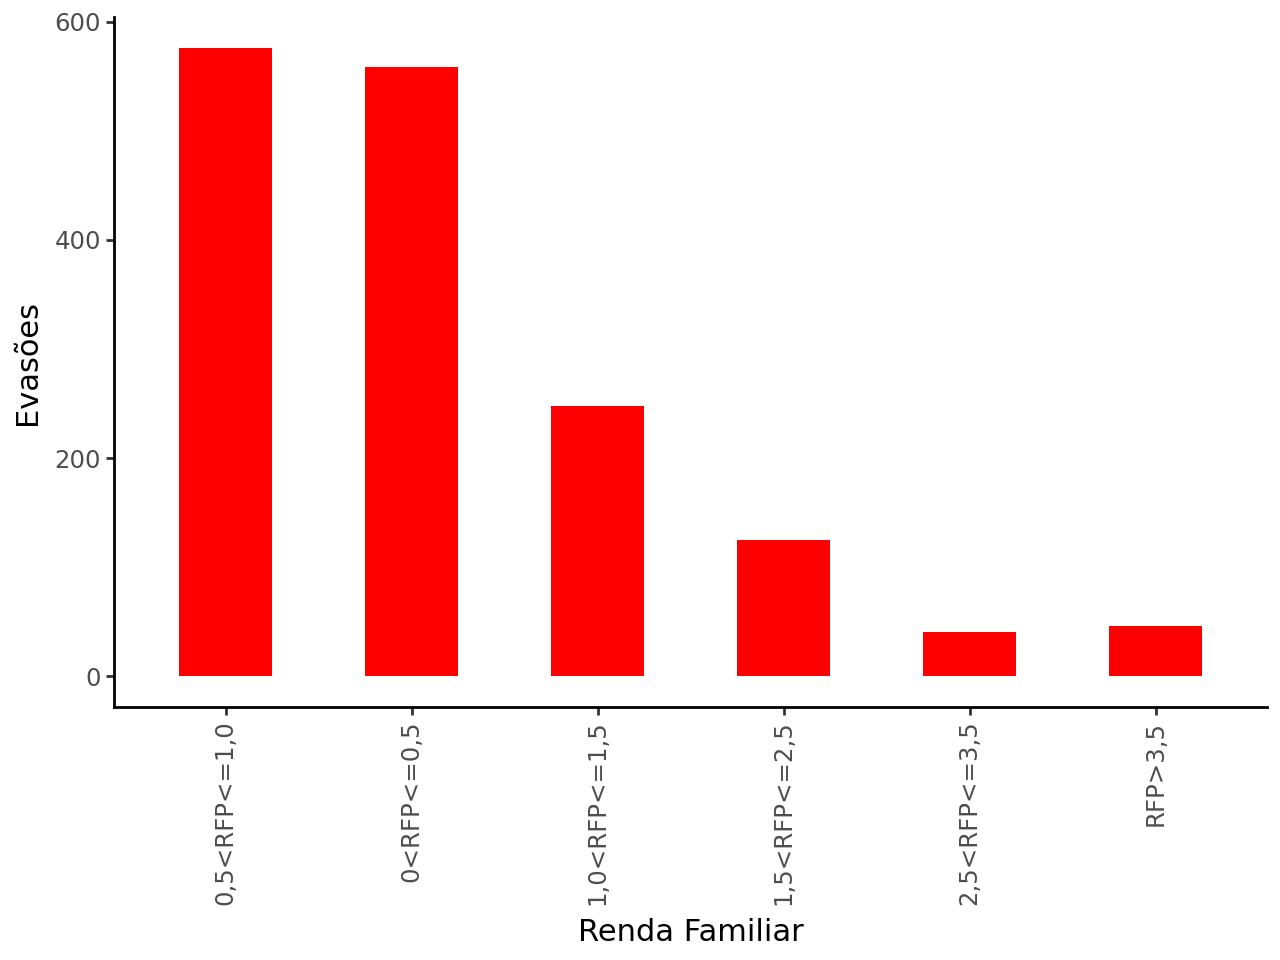

In [32]:
#Renda Familiar

(
    ggplot(df_evaded, aes(x="Renda Familiar"))
    + geom_histogram(binwidth=0.5, show_legend=True, fill="red")
    + labs(y="Evasões")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

**Evasão por: Faixa Etária**

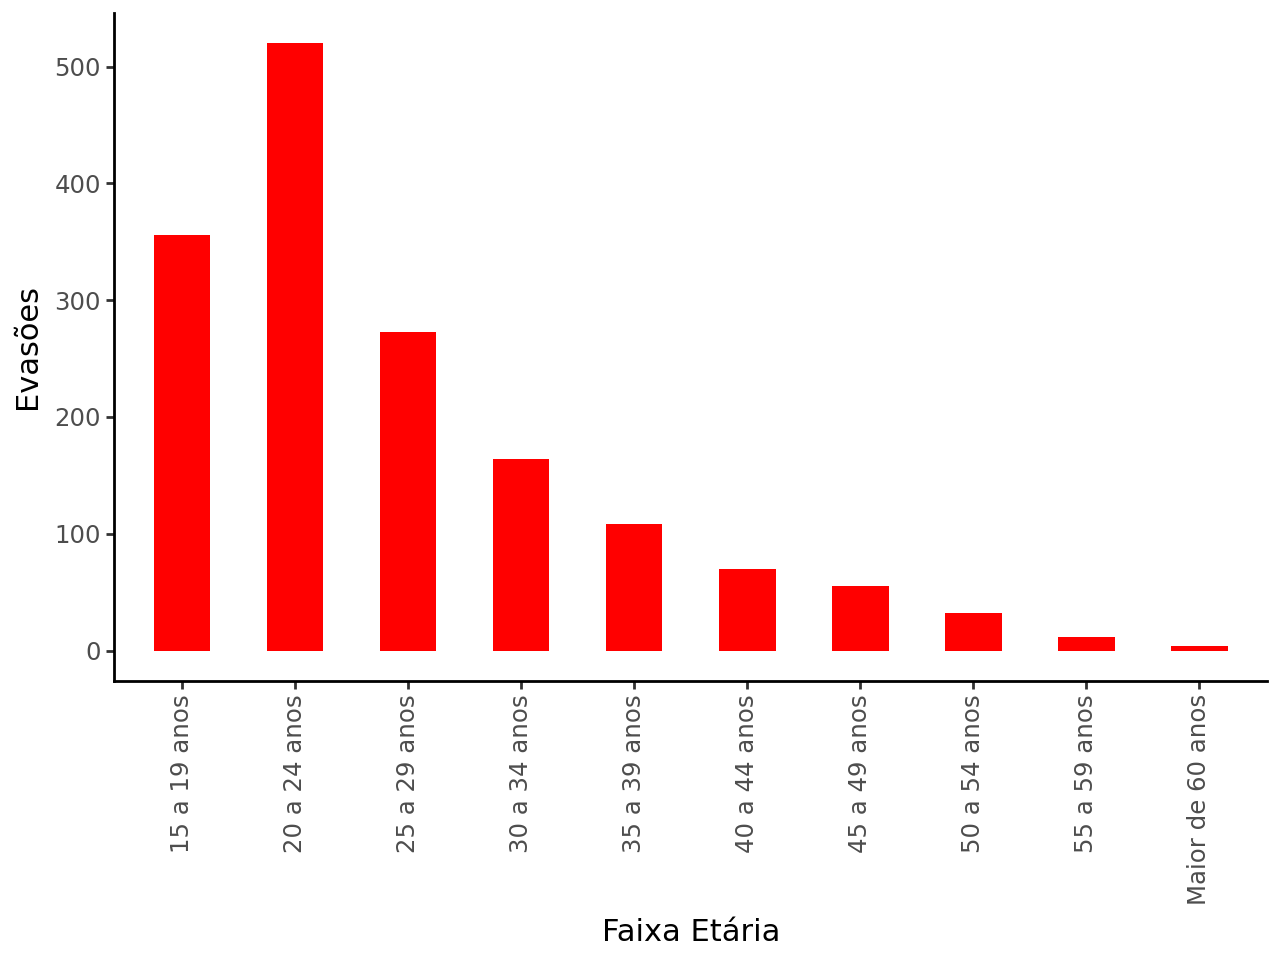

In [33]:
#Faixa Etária

(
    ggplot(df_evaded, aes(x="Faixa Etária"))
    + geom_histogram(binwidth=0.5, show_legend=True, fill="red")
    + labs(y="Evasões")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

**Evasão por: Cor/Raça**

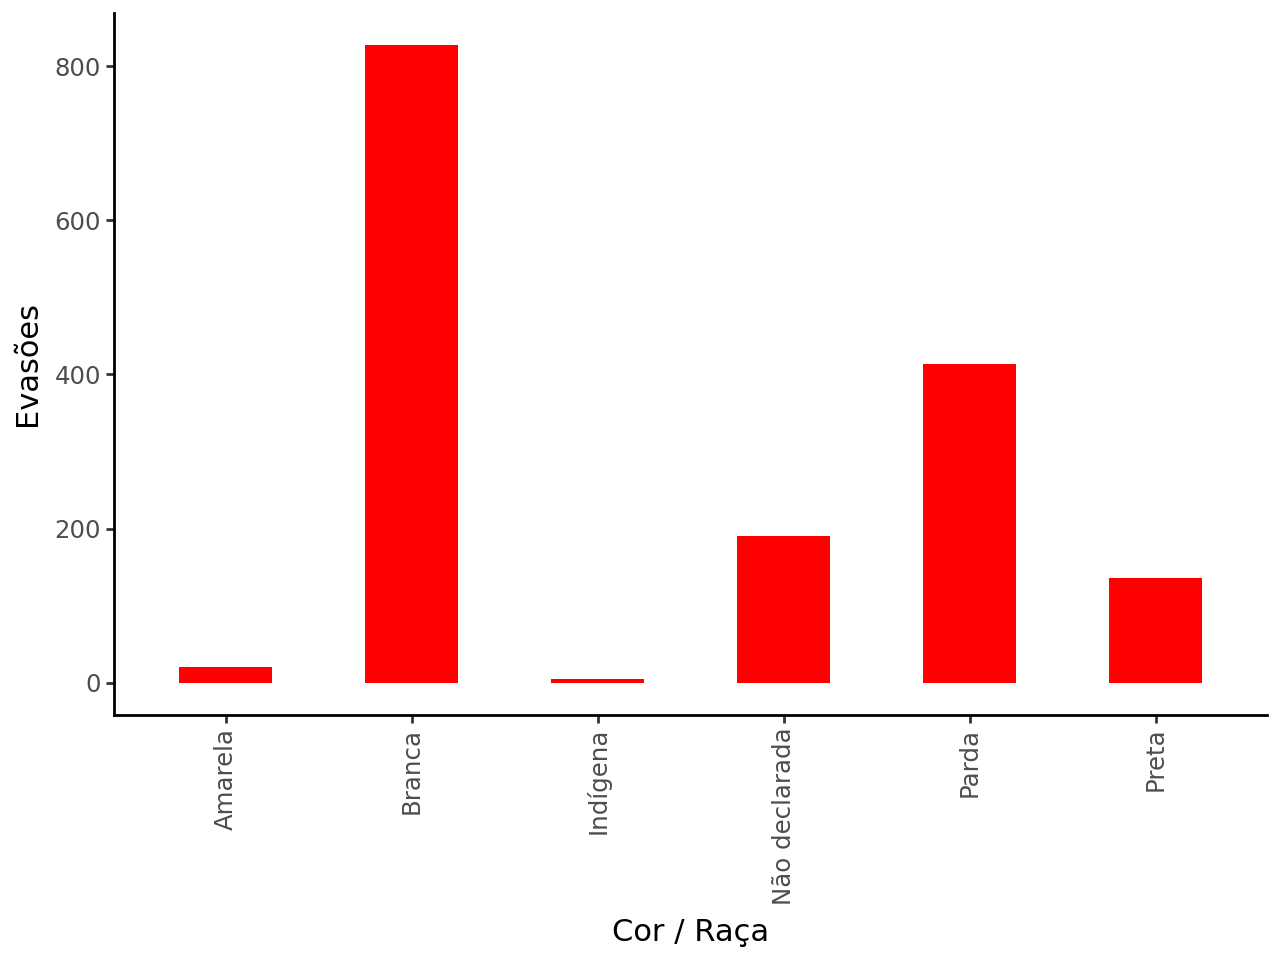

In [35]:
#Cor/Raça

(
    ggplot(df_evaded, aes(x="Cor / Raça"))
    + geom_histogram(binwidth=0.5, show_legend=True, fill="red")
    + labs(y="Evasões")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

**Evasão por: Sexo**

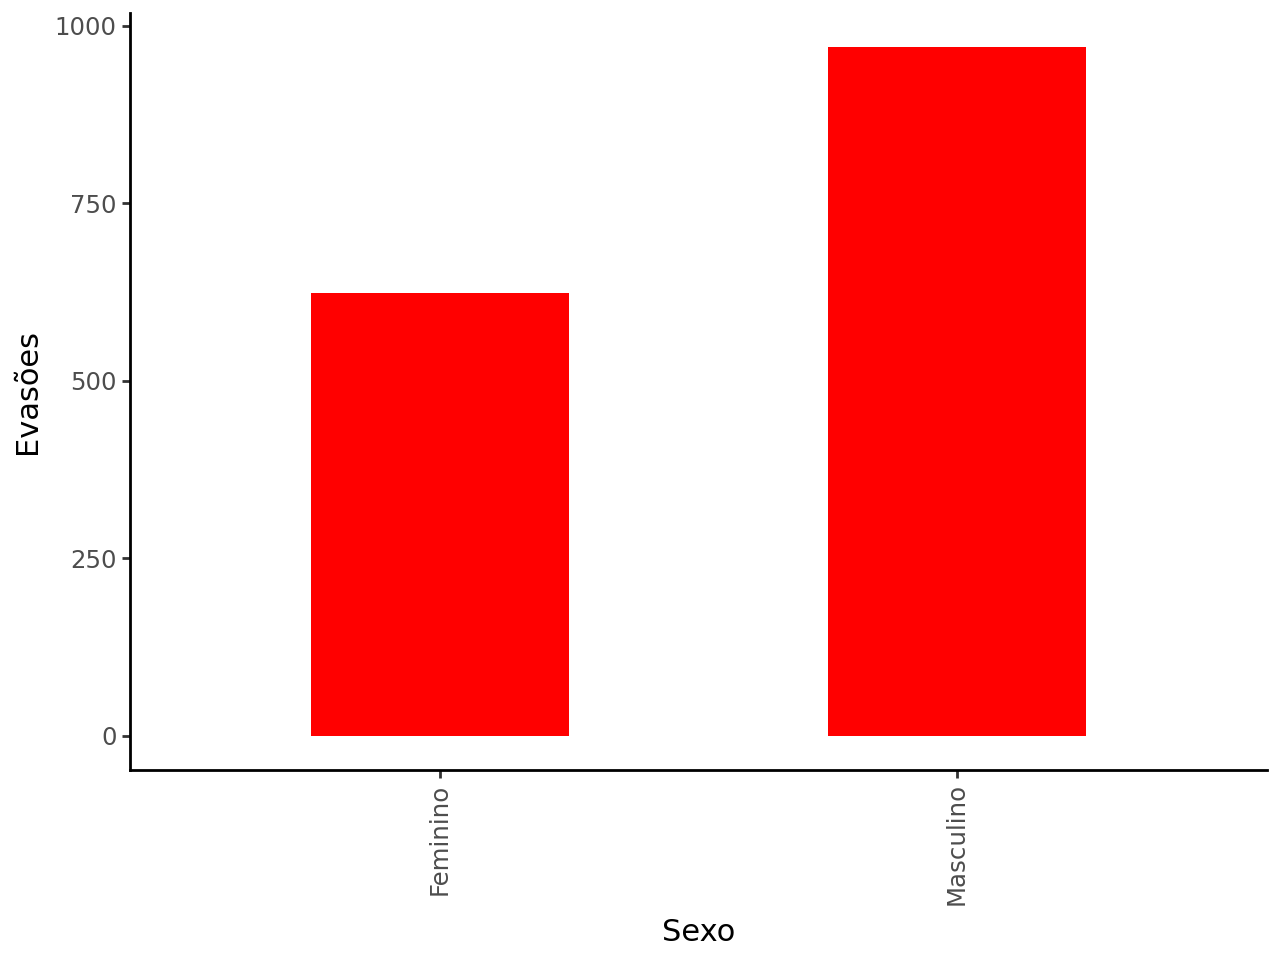

In [36]:
#Sexo

(
    ggplot(df_evaded, aes(x="Sexo"))
    + geom_histogram(binwidth=0.5, show_legend=True, fill="red")
    + labs(y="Evasões")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

#### **3.3. COMPARATIVO ENTRE DADOS DE EVASÃO E DADOS GERAIS DO IFSP**

**Matrículas/Evasão por: Tipo de Curso**

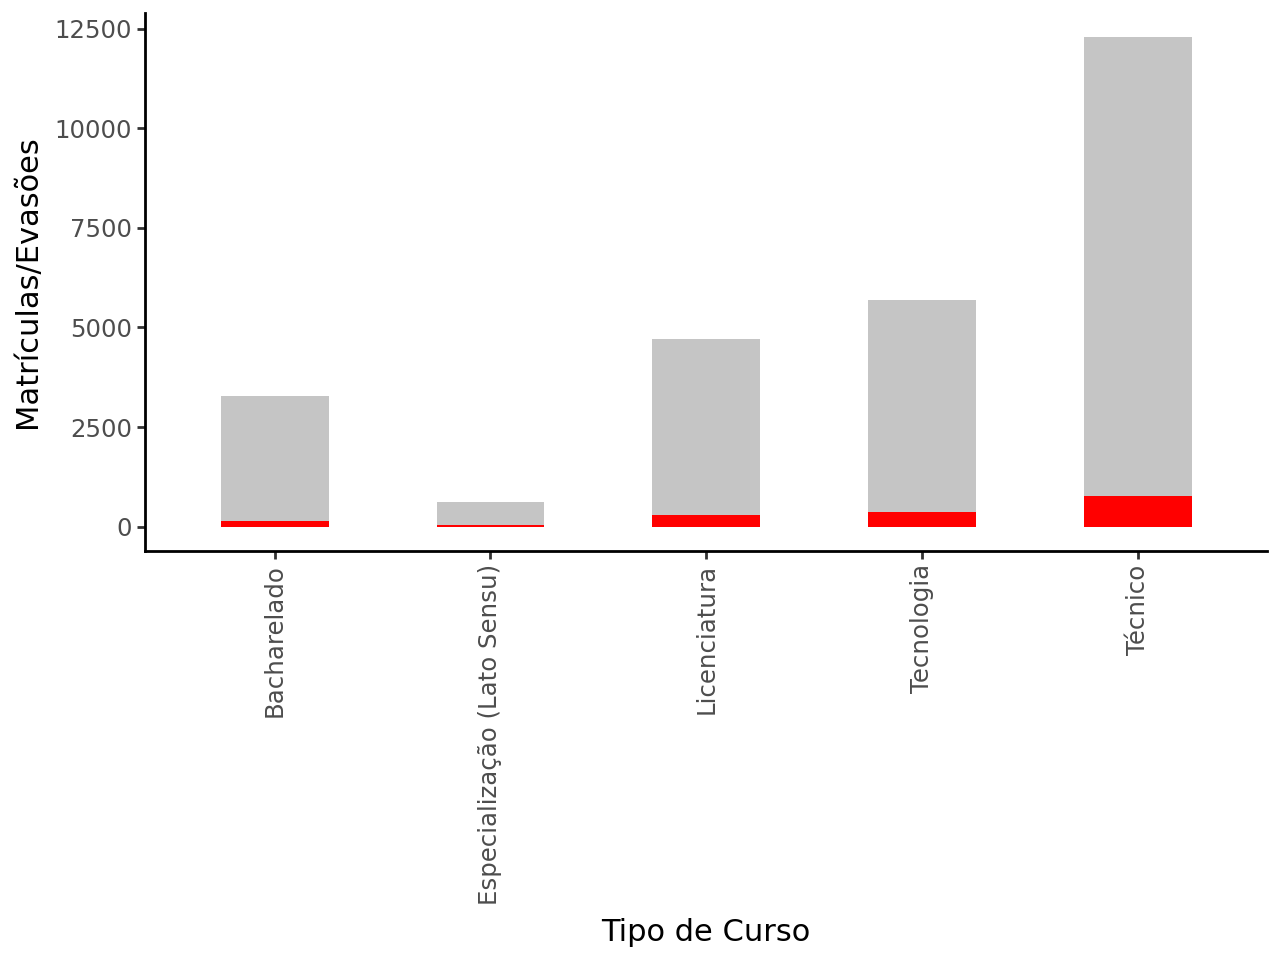

In [37]:
#Matrículas por tipo de curso

(
    ggplot(df_evaded, aes(x="Tipo de Curso"))
    + geom_histogram(data=df_filtered, mapping=aes(x="Tipo de Curso"), binwidth=0.5, alpha=0.35, show_legend=True)
    + geom_histogram(binwidth=0.5, show_legend=True, fill="red")
    + labs(y="Matrículas/Evasões")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

**Matrículas/Evasão por: Renda Familiar**

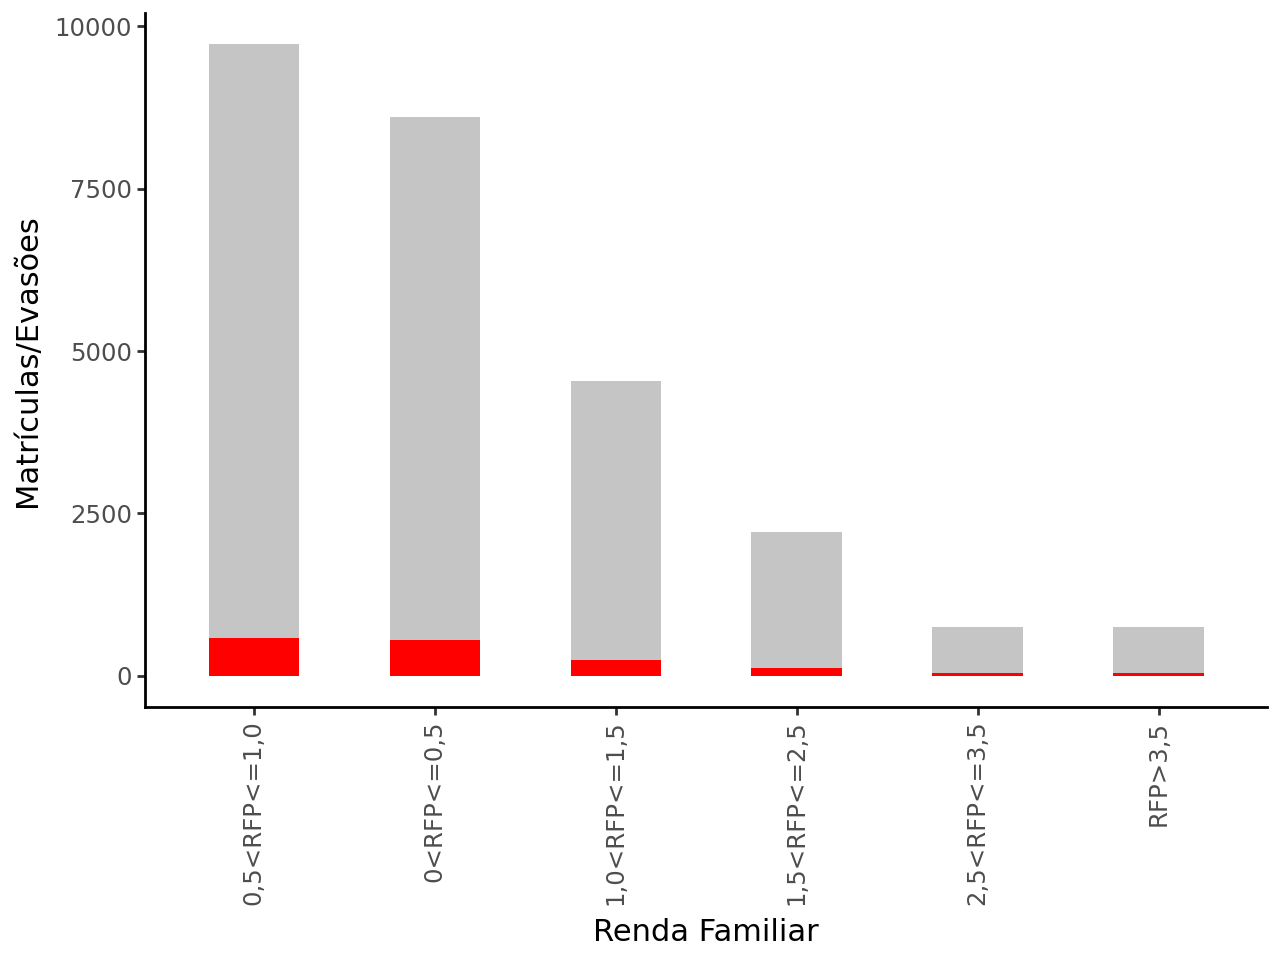

In [38]:
#Renda Familiar

(
    ggplot(df_evaded, aes(x="Renda Familiar"))
    + geom_histogram(data=df_filtered, mapping=aes(x="Renda Familiar"), binwidth=0.5, alpha=0.35, show_legend=True)
    + geom_histogram(binwidth=0.5, show_legend=True, fill="red")
    + labs(y="Matrículas/Evasões")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

**Matrículas/Evasão por: Faixa Etária**

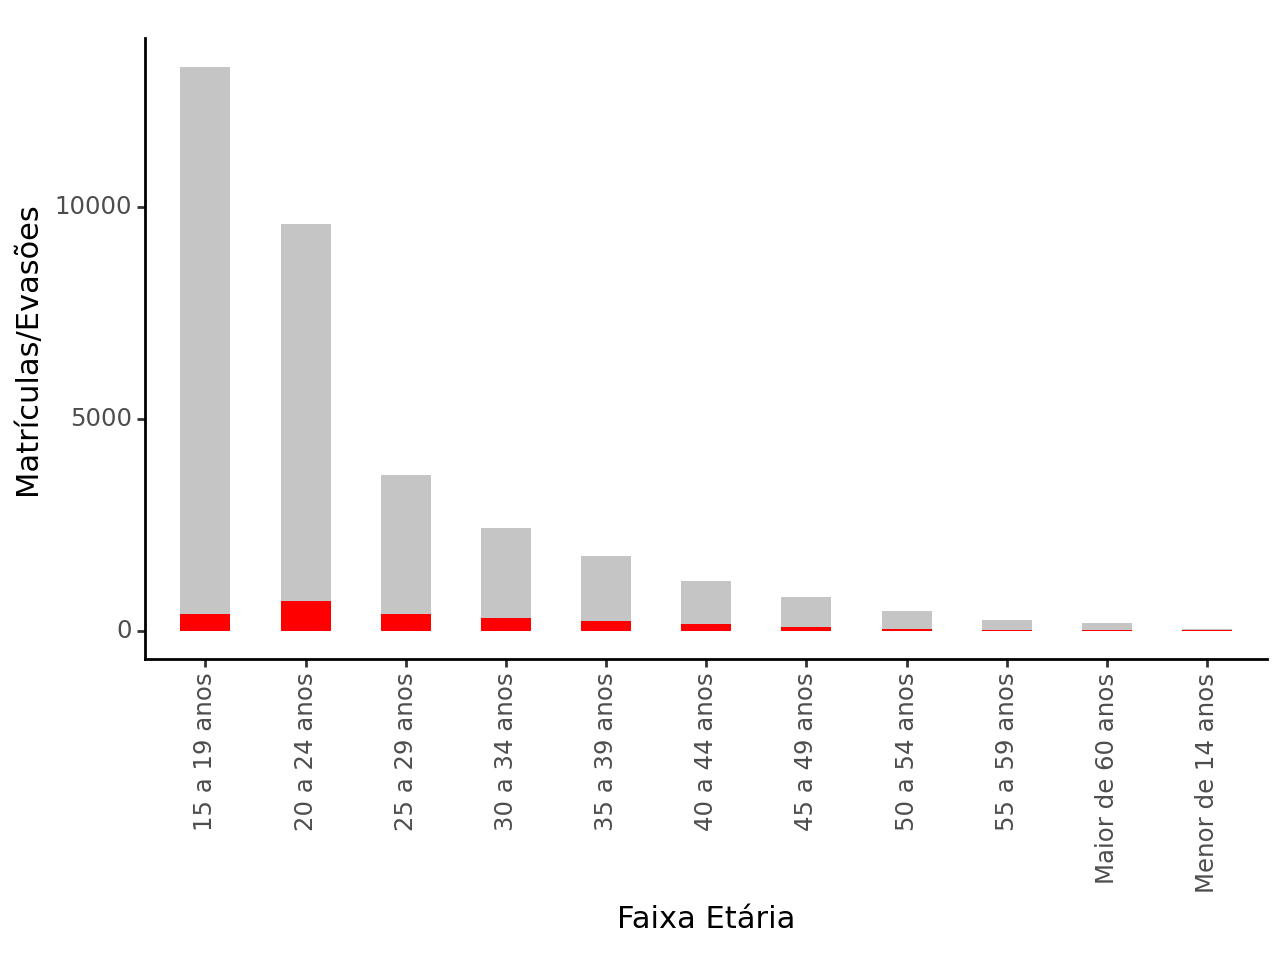

<Figure Size: (640 x 480)>

In [103]:
#Faixa Etária

(
    ggplot(df_evaded, aes(x="Faixa Etária"))
    + geom_histogram(data=df_filtered, mapping=aes(x="Faixa Etária"), binwidth=0.5, alpha=0.35, show_legend=True)
    + geom_histogram(binwidth=0.5, show_legend=True, fill="red")
    + labs(y="Matrículas/Evasões")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

**Matrículas/Evasão por: Cor/Raça**

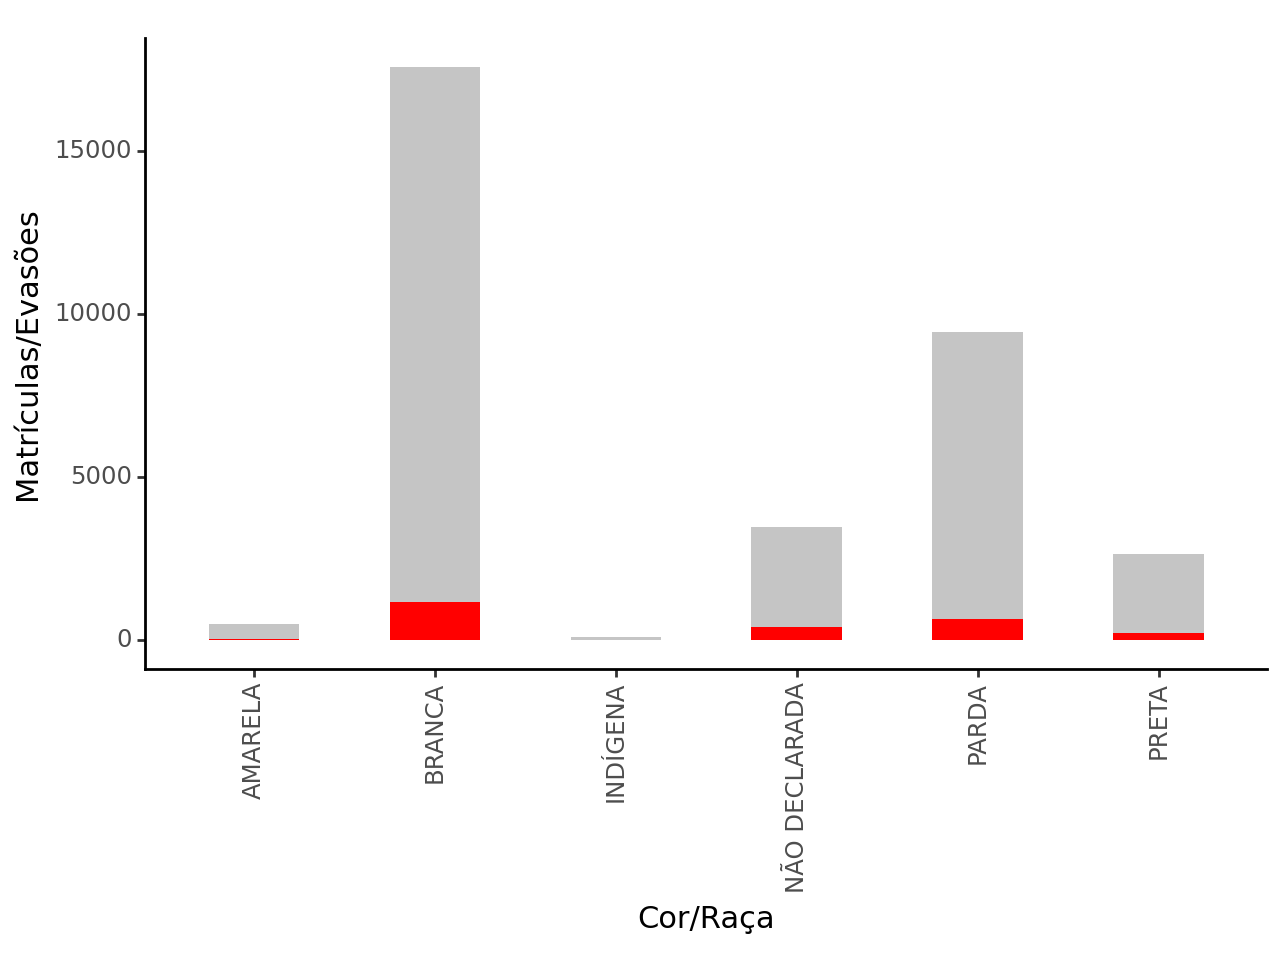

<Figure Size: (640 x 480)>

In [104]:
#Cor/Raça

(
    ggplot(df_evaded, aes(x="Cor/Raça"))
    + geom_histogram(data=df_filtered, mapping=aes(x="Cor/Raça"), binwidth=0.5, alpha=0.35, show_legend=True)
    + geom_histogram(binwidth=0.5, show_legend=True, fill="red")
    + labs(y="Matrículas/Evasões")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

**Matrículas/Evasão por: Sexo**

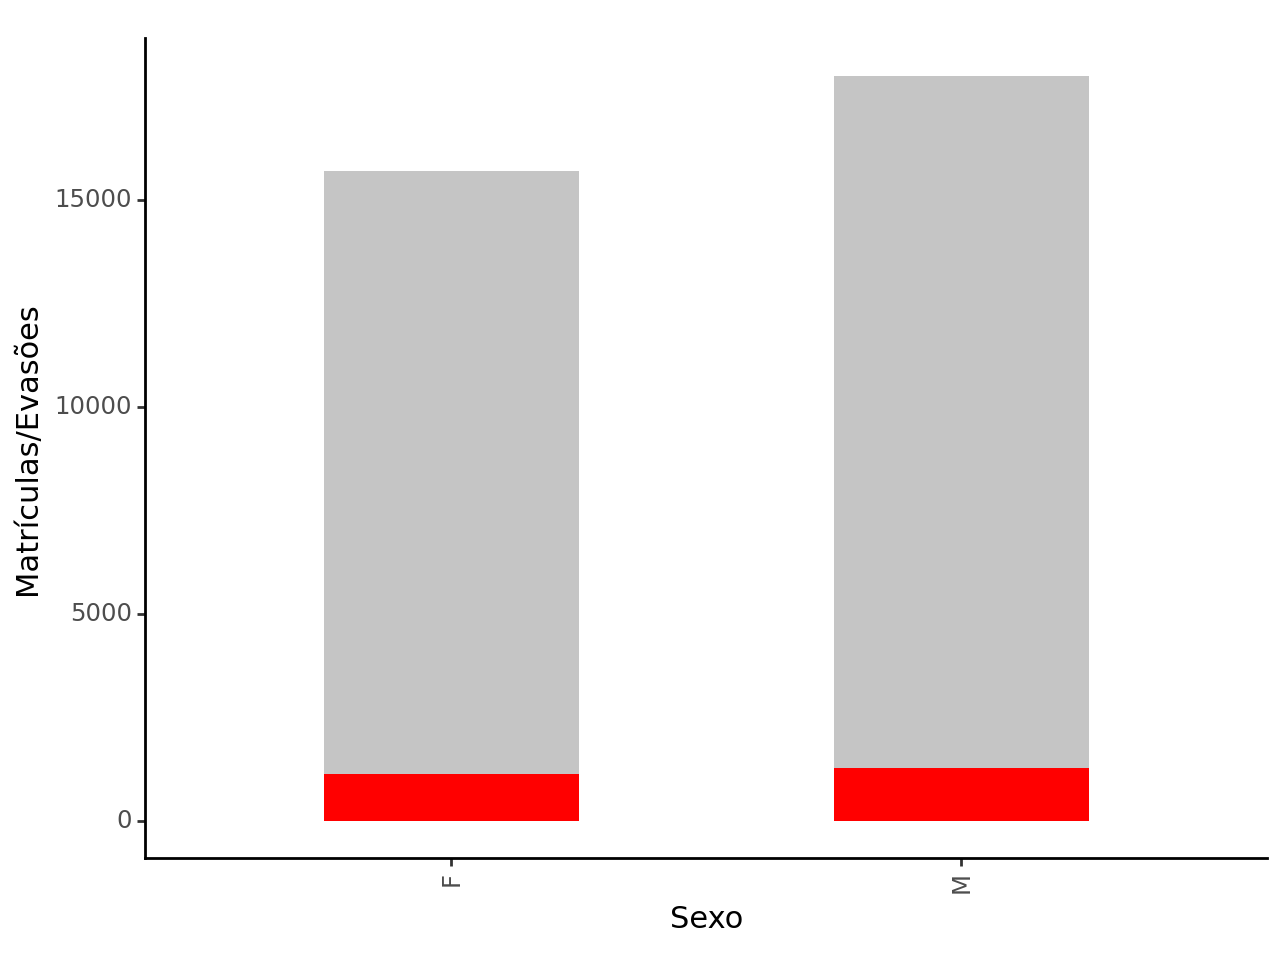

<Figure Size: (640 x 480)>

In [105]:
#Sexo

(
    ggplot(df_evaded, aes(x="Sexo"))
    + geom_histogram(data=df_filtered, mapping=aes(x="Sexo"), binwidth=0.5, alpha=0.35, show_legend=True)
    + geom_histogram(binwidth=0.5, show_legend=True, fill="red")
    + labs(y="Matrículas/Evasões")
    + theme_classic()
    + theme(axis_text_x = element_text(angle=90))
)

## **Referências Bibliográficas**

[1] PNP - Dados Abertos - MEC. Disponível em: <https://dadosabertos.mec.gov.br/pnp>. Acesso em: 14 jun. 2024.

[2] 2020 - Microdados Matrículas - Portal de Dados Abertos do Ministério da Educação. Disponível em: <https://dadosabertos.mec.gov.br/pnp/item/134-2020-microdados-matriculas>. Acesso em: 14 jun. 2024.
